#1) Mengumpulkan dataset

Dataset ini didapat dari UCI Machine Learning dengan link: https://archive.ics.uci.edu/dataset/571/hcv+data . Data ini memiliki 12 features dengan 612 data didalam.

##Load Data

In [ ]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#load data yang diperlukan
dataset=pd.read_csv('hcvdat0.csv')

#2) Menelaah Data

In [ ]:
#Menampilkan 5 data teratas
dataset.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
#Menampilkan 5 data terakhir dari setiap kolom
dataset.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [ ]:
#Menampilkan informasi dari dataset baik itu nama, jumlah data dan type data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


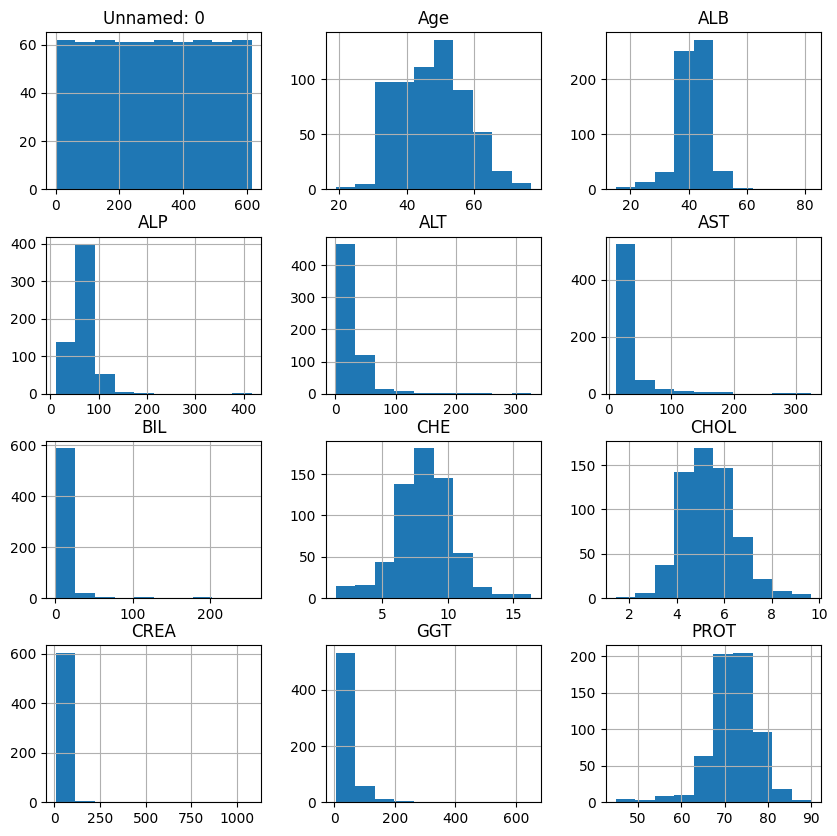

In [ ]:
data_hist=dataset.hist(figsize=(10,10))

#3 Memvalidasi data

In [ ]:
#Menampilkan jumlah data duplicated
dataset.duplicated().sum()

0

In [ ]:
#Menampilkan data missing value atau kosong
dataset.isnull().sum()

,0
Unnamed: 0,0
Category,0
Age,0
Sex,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0


In [ ]:
#menampilkan jumlah data unique dari setiap kolom
unique_value={}
for col in dataset.columns:
  unique_count=dataset[col].nunique()
  unique_value[col]=unique_count

for col, count in unique_value.items():
  print(f"{col:<20} : {count:>5} values ")

Unnamed: 0           :   615 values 
Category             :     5 values 
Age                  :    49 values 
Sex                  :     2 values 
ALB                  :   189 values 
ALP                  :   414 values 
ALT                  :   341 values 
AST                  :   297 values 
BIL                  :   188 values 
CHE                  :   407 values 
CHOL                 :   313 values 
CREA                 :   117 values 
GGT                  :   358 values 
PROT                 :   198 values 


In [ ]:
cat_col=[col for col in dataset.columns if dataset[col].dtype=='object']
for col in cat_col:
  print(f'{col} has {dataset[col].unique()} values ')

Category has ['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis'] values 
Sex has ['m' 'f'] values 


#4) Menentukan objek

In [ ]:
data_drop=dataset.drop(columns=['Unnamed: 0'])

In [ ]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [ ]:
#Menampilkan perhitungan, mean, standar deviasi, min, Q1,Q2,Q3 dan Max
data_drop.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


#5) Membersihkan data

In [ ]:
#Membersihkan data duplikat
data_drop=data_drop.drop_duplicates()
data_drop[data_drop.duplicated(keep=False)]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT


In [ ]:
#Menghapus data missing value dengan menggunakan mode
data_drop=data_drop.fillna(data_drop.mode().iloc[0])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

#Mengubah data kolom kategori menjadi numerik
for col in cat_col:
  data_drop[col]=le.fit_transform(data_drop[col])

In [ ]:
#Menampilkan tipe data
data_drop.dtypes

,0
Category,int64
Age,int64
Sex,int64
ALB,float64
ALP,float64
ALT,float64
AST,float64
BIL,float64
CHE,float64
CHOL,float64


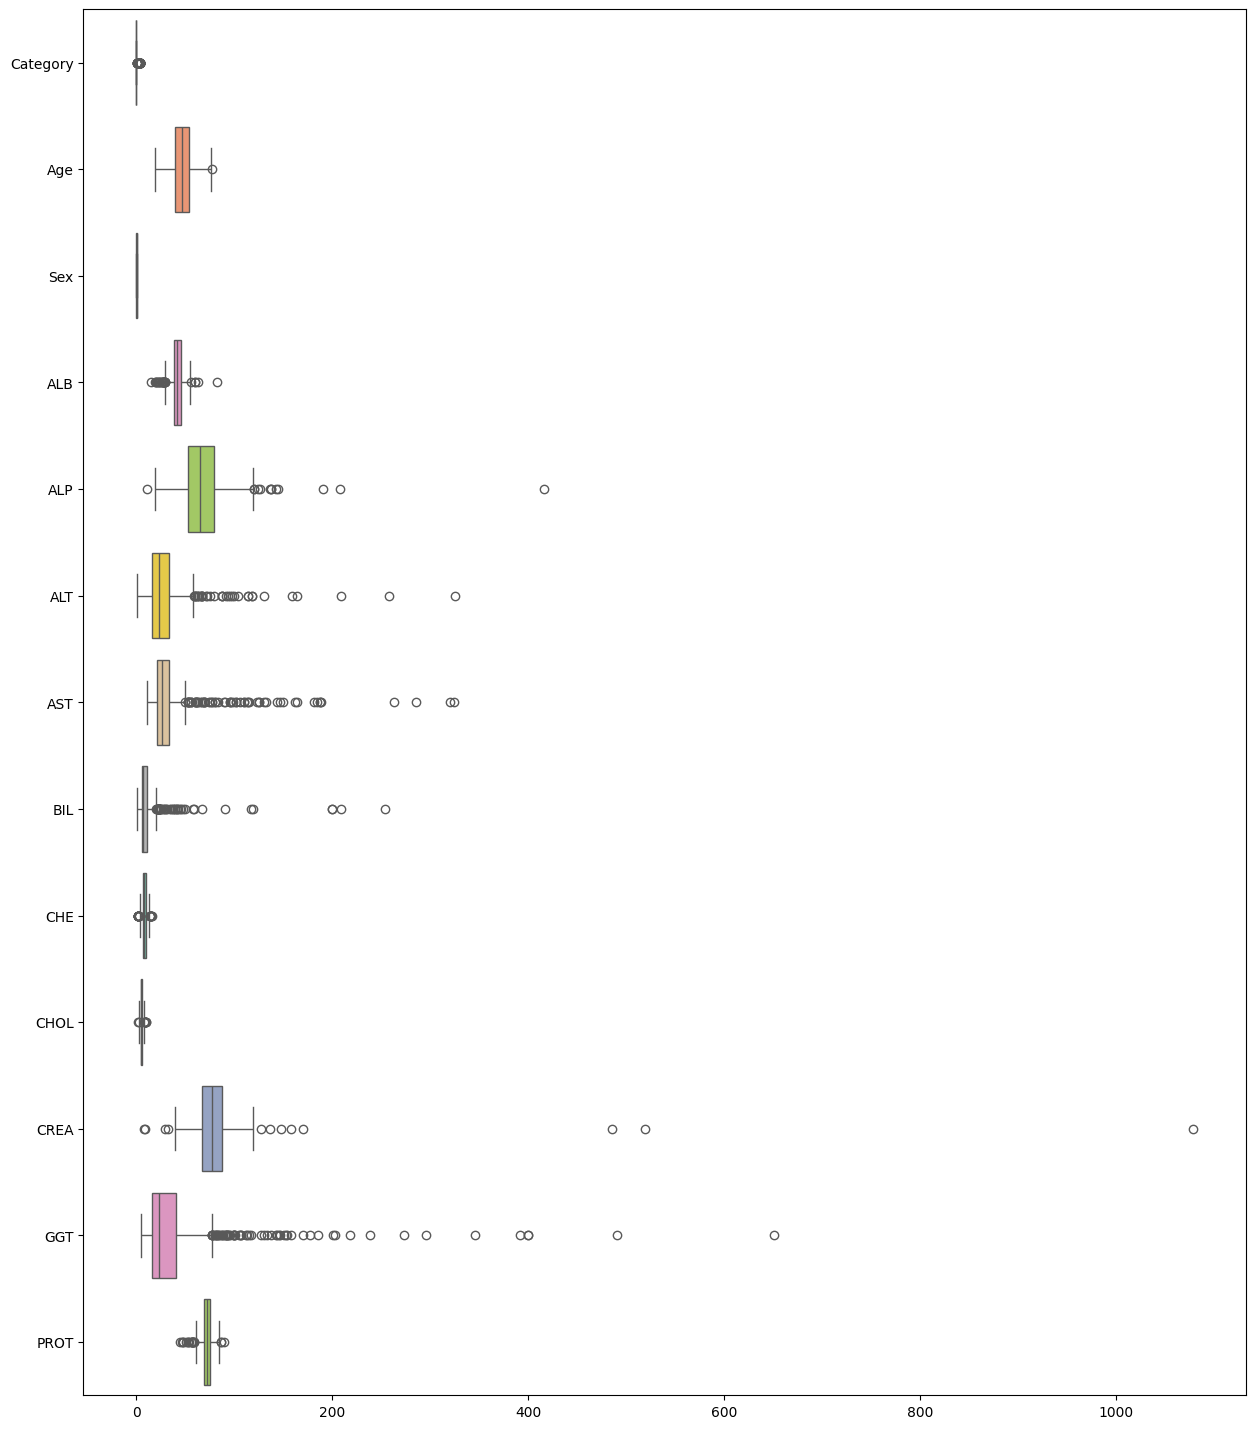

In [ ]:
#Menampilkan outlayer
plt.figure(figsize=(15,18))
sns.boxplot(data=data_drop,orient='h', palette='Set2')
plt.show()

In [ ]:
data_iqr=data_drop.copy()
for col in data_drop.select_dtypes(include=['int64','float']):
  if col not in ['CHOL','Sex','Age','Category']:
    Q1=data_drop[col].quantile(0.25)
    Q3=data_drop[col].quantile(0.75)
    IQR=Q1-Q3
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    data_iqr[col]=data_drop[col].apply(lambda x:lower_bound if x<lower_bound else(upper_bound if x > upper_bound else x))
    print(f"Outlayer pada {col} sudah ditangani dengan IQR")

Outlayer pada ALB sudah ditangani dengan IQR
Outlayer pada ALP sudah ditangani dengan IQR
Outlayer pada ALT sudah ditangani dengan IQR
Outlayer pada AST sudah ditangani dengan IQR
Outlayer pada BIL sudah ditangani dengan IQR
Outlayer pada CHE sudah ditangani dengan IQR
Outlayer pada CREA sudah ditangani dengan IQR
Outlayer pada GGT sudah ditangani dengan IQR
Outlayer pada PROT sudah ditangani dengan IQR


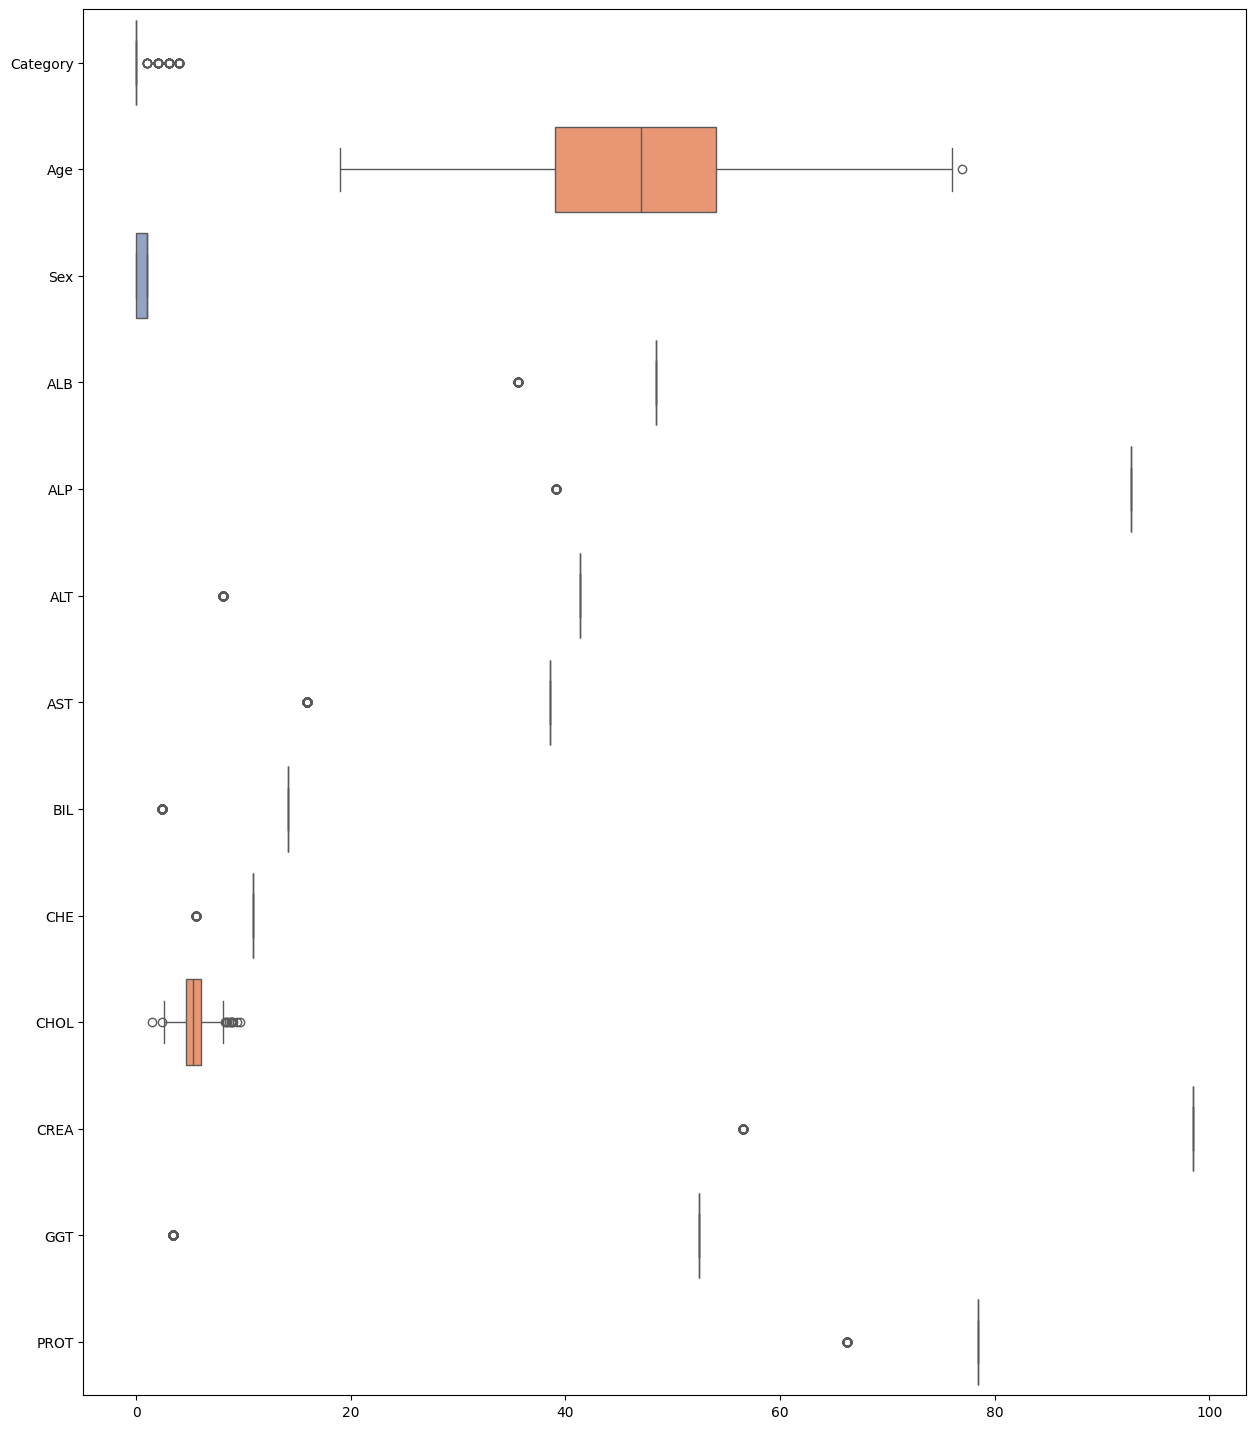

In [ ]:
#Menampilkan outlayer
plt.figure(figsize=(15,18))
sns.boxplot(data=data_iqr,orient='h', palette='Set2')
plt.show()

#6) Mengkontruksi data

In [ ]:
data_iqr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    int64  
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    int64  
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 62.6 KB


In [ ]:
data_iqr.describe()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.386992,47.408130,0.613008,47.567480,87.470732,36.880854,34.691463,12.288862,10.494427,5.363252,94.129268,43.287398,77.319268
std,1.052294,10.055105,0.487458,3.159018,15.917145,11.387211,8.510723,4.304384,1.439060,1.124100,12.834925,19.120897,3.540728
min,0.000000,19.000000,0.000000,35.600000,39.100000,8.075000,15.950000,2.350000,5.607500,1.430000,56.500000,3.450000,66.250000
25%,0.000000,39.000000,0.000000,48.400000,92.700000,41.375000,38.550000,14.150000,10.917500,4.620000,98.500000,52.450000,78.450000
50%,0.000000,47.000000,1.000000,48.400000,92.700000,41.375000,38.550000,14.150000,10.917500,5.290000,98.500000,52.450000,78.450000
75%,0.000000,54.000000,1.000000,48.400000,92.700000,41.375000,38.550000,14.150000,10.917500,6.055000,98.500000,52.450000,78.450000
max,4.000000,77.000000,1.000000,48.400000,92.700000,41.375000,38.550000,14.150000,10.917500,9.670000,98.500000,52.450000,78.450000


In [ ]:
data_iqr.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,48.4,92.7,41.375,38.55,14.15,10.9175,3.23,56.5,52.45,78.45
1,0,32,1,48.4,92.7,41.375,38.55,14.15,5.6075,4.80,98.5,52.45,78.45
2,0,32,1,48.4,92.7,41.375,15.95,14.15,10.9175,5.20,98.5,52.45,66.25
3,0,32,1,48.4,92.7,41.375,38.55,2.35,10.9175,4.74,98.5,52.45,78.45
4,0,32,1,48.4,92.7,41.375,38.55,14.15,10.9175,4.32,98.5,52.45,78.45


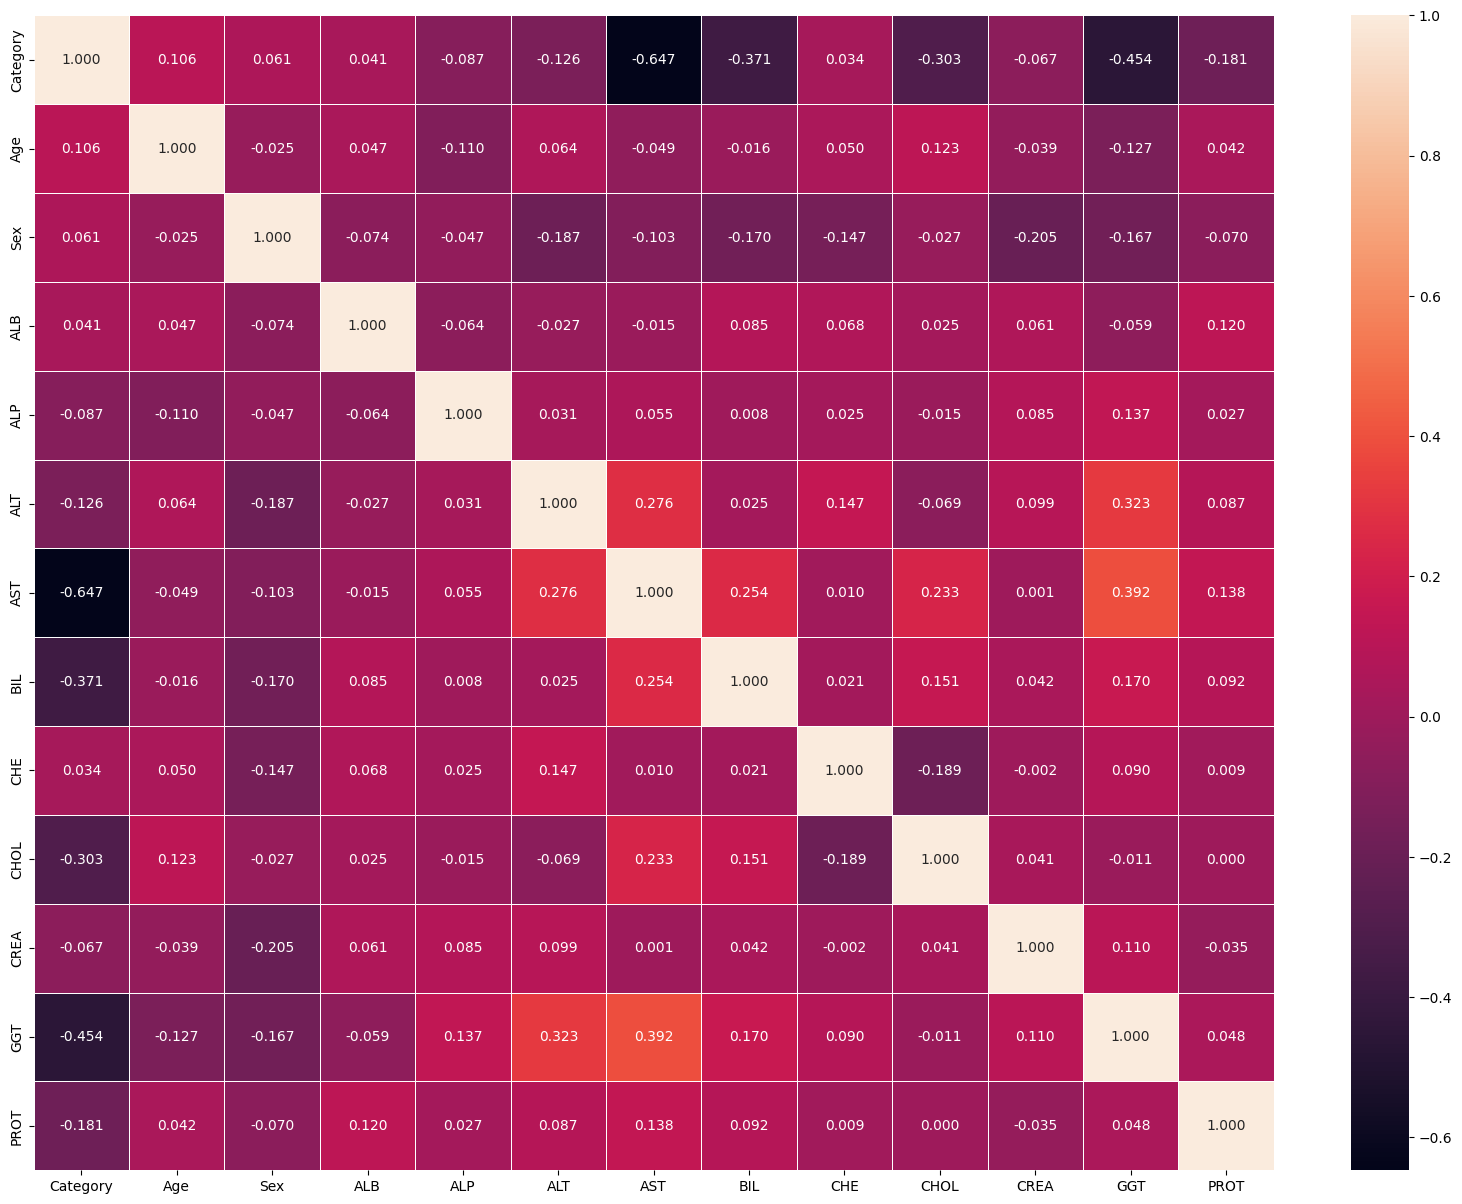

In [ ]:
cor_map=data_iqr.corr()
fig,ax=plt.subplots(figsize=(20,15))
sns.heatmap(cor_map, annot=True, fmt=".3f",linewidths=0.5)
plt.show()

#7) Menentukan Label

In [ ]:
X=data_iqr.drop('Category',axis=1)
y=data_iqr['Category']

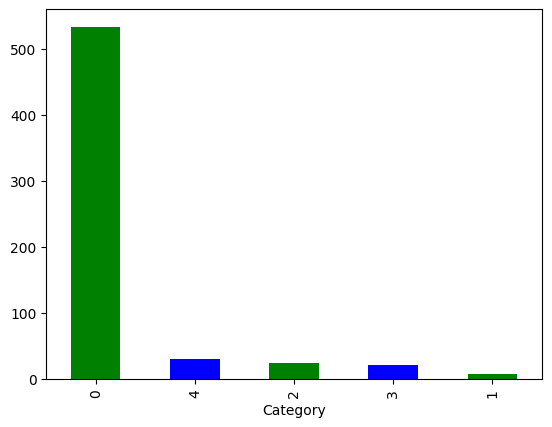

<Figure size 1000x800 with 0 Axes>

In [ ]:
data_iqr['Category'].value_counts().plot(kind='bar',color=['green','Blue'])
plt.figure(figsize=(10,8))
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
smote=SMOTE(random_state=42)
x_smote,y_smote=smote.fit_resample(X,y)

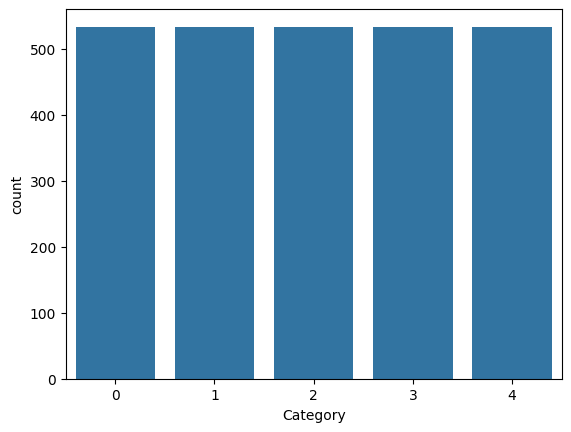

In [ ]:
sns.countplot(x=y_smote)
plt.show()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x_smote,y_smote, test_size=0.2, random_state=0, stratify=y_smote)

#8) Membangun Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
rf= RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
lr= LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
nb= KNeighborsClassifier()
nb.fit(X_train,y_train)

KNeighborsClassifier()

9) Mengevaluasi Model

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
y_pred_dt=dt.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_dt))
print("Laporan Klasifikasi ")
print(classification_report(y_test,y_pred_dt))

Accuracy:  0.926829268292683
Laporan Klasifikasi 
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       106
           1       0.98      0.98      0.98       107
           2       0.90      0.92      0.91       106
           3       0.87      0.94      0.91       107
           4       0.94      0.92      0.93       107

    accuracy                           0.93       533
   macro avg       0.93      0.93      0.93       533
weighted avg       0.93      0.93      0.93       533



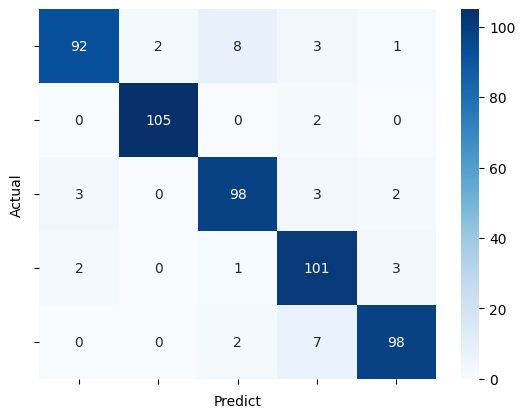

In [ ]:
cm_dt=confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm_dt,annot=True, fmt='d',cmap="Blues",xticklabels=['','','','',''],yticklabels=['','','','',''])
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

In [ ]:
y_pred_rf=rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Laporan Klasifikasi ")
print(classification_report(y_test,y_pred_rf))

Accuracy:  0.9737335834896811
Laporan Klasifikasi 
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       106
           1       0.99      1.00      1.00       107
           2       0.99      0.98      0.99       106
           3       0.94      0.97      0.95       107
           4       0.99      0.96      0.98       107

    accuracy                           0.97       533
   macro avg       0.97      0.97      0.97       533
weighted avg       0.97      0.97      0.97       533



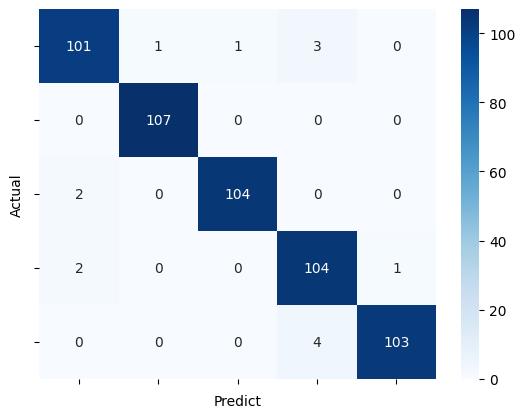

In [ ]:
cm_rf=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm_rf,annot=True, fmt='d',cmap="Blues",xticklabels=['','','','',''],yticklabels=['','','','',''])
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

In [ ]:
y_pred_lr=lr.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_lr))
print("Laporan Klasifikasi ")
print(classification_report(y_test,y_pred_lr))

Accuracy:  0.7823639774859287
Laporan Klasifikasi 
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       106
           1       0.96      0.90      0.93       107
           2       0.67      0.66      0.67       106
           3       0.76      0.69      0.72       107
           4       0.88      0.83      0.86       107

    accuracy                           0.78       533
   macro avg       0.79      0.78      0.78       533
weighted avg       0.79      0.78      0.78       533



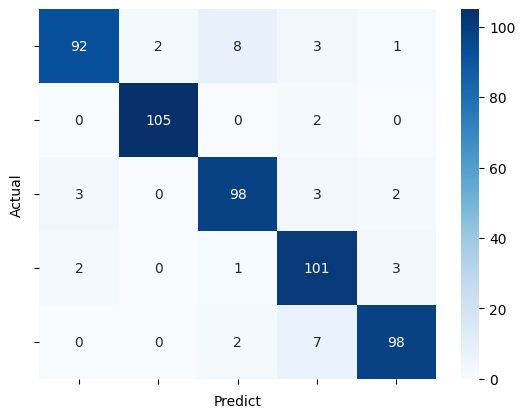

In [ ]:
cm_dt=confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm_dt,annot=True, fmt='d',cmap="Blues",xticklabels=['','','','',''],yticklabels=['','','','',''])
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

In [ ]:
y_pred_nb=nb.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_nb))
print("Laporan Klasifikasi ")
print(classification_report(y_test,y_pred_nb))

Accuracy:  0.9437148217636022
Laporan Klasifikasi 
              precision    recall  f1-score   support

           0       0.99      0.85      0.91       106
           1       0.99      1.00      1.00       107
           2       0.90      0.97      0.94       106
           3       0.89      0.94      0.92       107
           4       0.95      0.95      0.95       107

    accuracy                           0.94       533
   macro avg       0.95      0.94      0.94       533
weighted avg       0.95      0.94      0.94       533



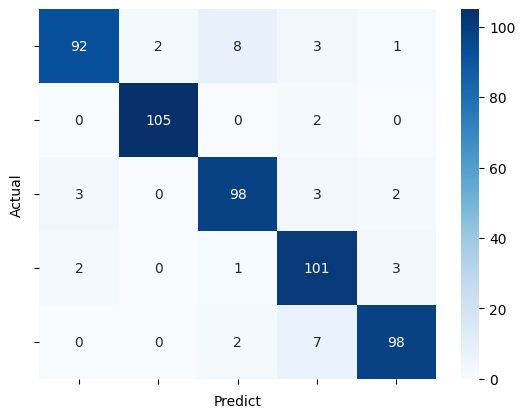

In [ ]:
cm_dt=confusion_matrix(y_test,y_pred_nb)
sns.heatmap(cm_dt,annot=True, fmt='d',cmap="Blues",xticklabels=['','','','',''],yticklabels=['','','','',''])
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

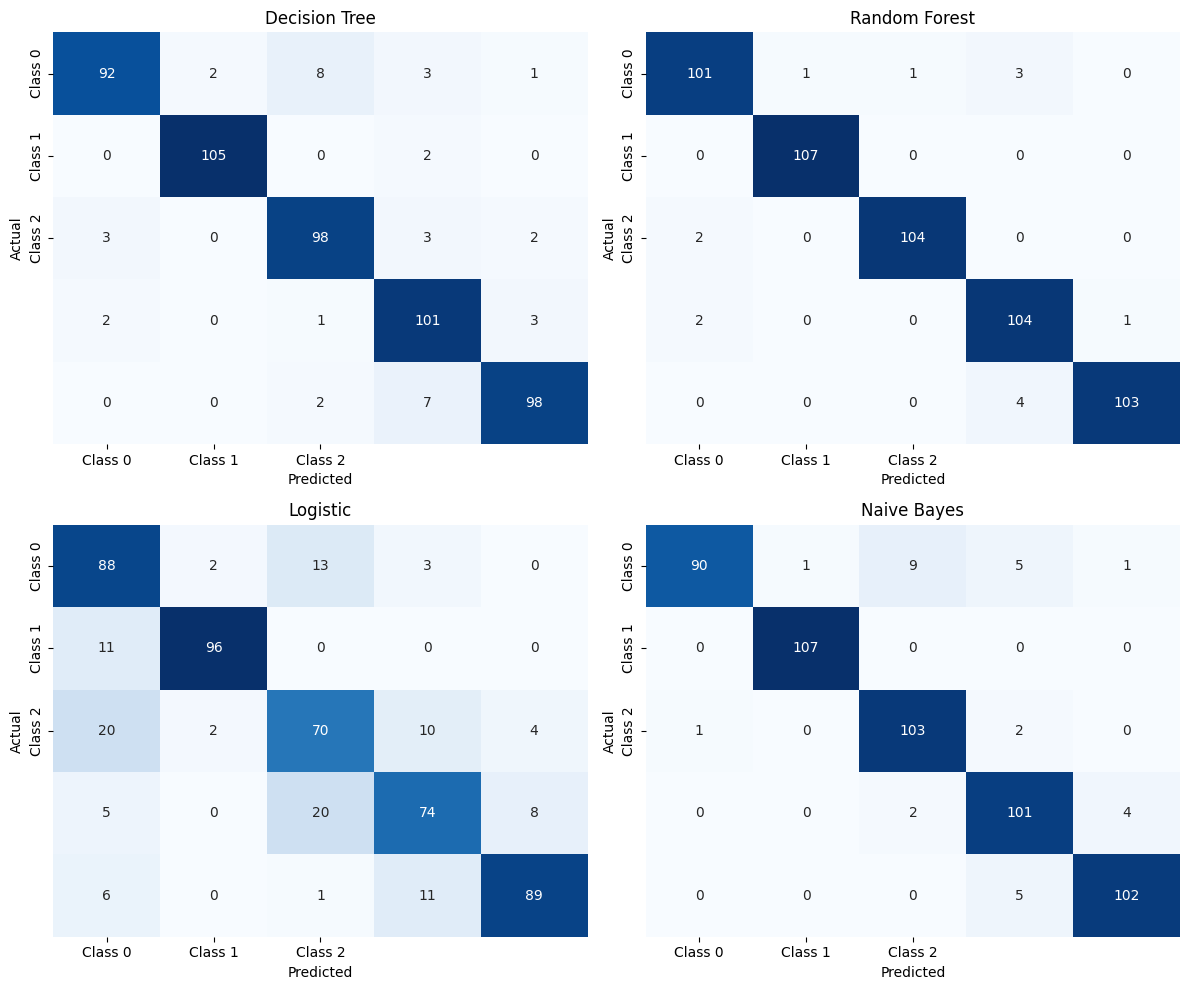

In [ ]:
# Nama model
models = ['Decision Tree', 'Random Forest', 'Logistic','Naive Bayes']
predictions = [y_pred_dt, y_pred_rf, y_pred_lr,y_pred_nb]

# Membuat subplot untuk 4 model
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Membuat grid 2x2
axes = axes.flatten()  # Flatten untuk iterasi yang lebih mudah

# Membuat heatmap untuk setiap model
for ax, model, y_pred in zip(axes, models, predictions):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=ax, cbar=False,
                xticklabels=['Class 0', 'Class 1', 'Class 2'],
                yticklabels=['Class 0', 'Class 1', 'Class 2'])
    ax.set_title(model)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [ ]:
model_names=['Decison Tree','Random Forest','Logistic Regression','Naive Bayes']
accuracies=[
            accuracy_score(y_test,y_pred_dt),
            accuracy_score(y_test,y_pred_rf),
            accuracy_score(y_test,y_pred_lr),
            accuracy_score(y_test,y_pred_nb)
]

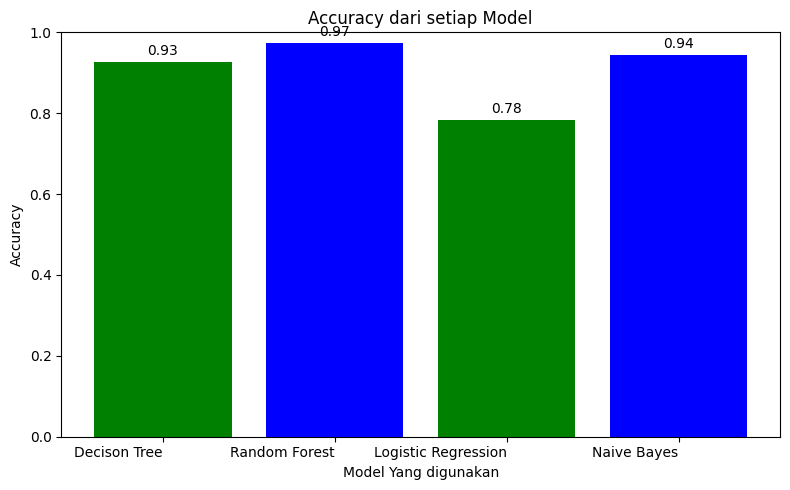

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(model_names,accuracies,color=['green','Blue'])
plt.xlabel("Model Yang digunakan")
plt.ylabel("Accuracy")
plt.title("Accuracy dari setiap Model")
plt.xticks(rotation=0, ha='right')
plt.ylim(0,1)

for i, v in enumerate(accuracies):
  plt.text(i,v+0.01, f'{v:.2f}',ha='center', va='bottom')

plt.tight_layout()
plt.show()